#### https://online.stat.psu.edu/stat501/lesson/4

A typical regression anlaysis involves the following steps: 
<ol> 
 <li>Model formulation</li>
 <li>Estimation</li>
 <li>Evaluation</li>
  <li>Model Use</li>
</ol>

#### How do we evaluate a model? We focus on graphical residual analysis. In the context of multiple LR, we'll also study some statistical tests for assessing the assumptions.

#### We need to check LINE assumptions; We also need to consier two problems: influential points; whether we miss an important predictor variable

#### Residual analysis: investigate the observed residuals to see if they behave "properly"

In [1]:
import os
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import Image
from statsmodels.formula.api import ols
import scipy.stats
from matplotlib import pyplot as plt
filedir = 'STAT501_Lesson04'
os.listdir(filedir)

['.DS_Store',
 'bluegills.txt',
 'alphapluto.txt',
 'residuals.txt',
 'alcoholarm.txt',
 'skincancer.txt',
 'residual_fit.png',
 'anscombe.txt',
 'residual_order.png',
 'adaptive.txt',
 'carstopping.txt',
 'incomebirth.txt',
 'oldfaithful.txt',
 'bloodpress.txt',
 'treadmill.txt',
 'alligator.txt',
 'realestate_sales.txt',
 'treadwear.txt',
 'alcoholtobacco.txt',
 'handheight.txt',
 'corrosion.txt',
 'solutions_conc.txt']

#### 1. Residuals vs. Fits Plot

In [2]:
df = pd.read_table(os.path.join(filedir, 'alcoholarm.txt'))
df

,alcohol,strength
0,36.2,10.0
1,39.7,10.0
2,39.5,10.8
3,18.2,12.2
4,29.2,13.1
5,32.5,14.0
6,13.2,15.5
7,14.8,15.5
8,28.6,15.2
9,30.8,15.2


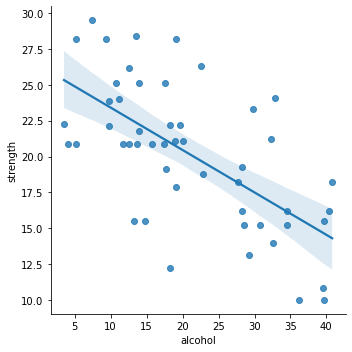

In [3]:
sns.lmplot(x='alcohol',y='strength',data=df,fit_reg=True)

In [4]:
df['intercept'] = 1
model = ols('strength ~ intercept + alcohol', data=df).fit()

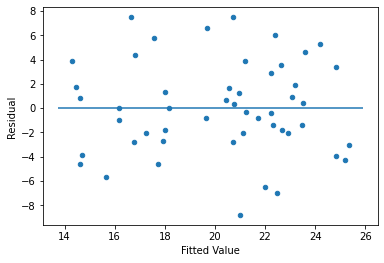

In [5]:
df_plot = pd.DataFrame({
    'Fitted Value':model.predict(df[['intercept','alcohol']]),
    'Residual':model.resid
})
ax = df_plot.plot.scatter(x='Fitted Value', y='Residual')
x_min, x_max = ax.get_xlim()
ax.hlines(0, x_min, x_max)

This plot is a classical exapmle of a good residuals vs. fits plot
<ol> 
 <li>Linear: the residuals bounce randomly around 0</li>
 <li>Independent: yay</li>
 <li>Normal: yay</li>
 <li>Equal variance: roughly form a horizontal band</li>
 <li>Outlier: no one residual stands out</li>
</ol>

#### 2. Residuals vs. Predictor Plot

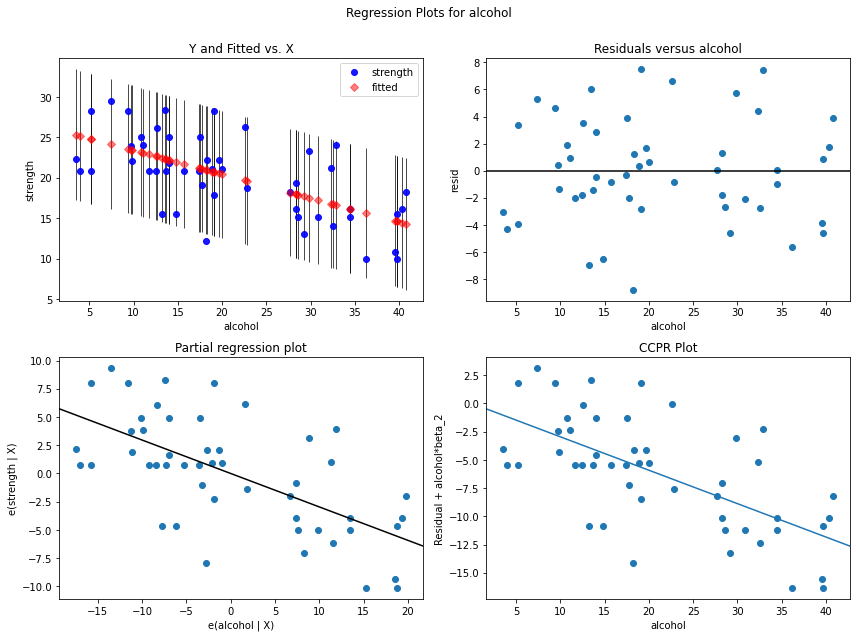

In [6]:
fig = plt.figure(figsize=(12, 9))
fig = sm.graphics.plot_regress_exog(model, 'alcohol', fig)

The interpretation of it is identical to that for a residuals vs. fits plot.

#### 3. Identifying Specific Problems Using Residual Plots

#### 3-1: nonlinear

In [7]:
df = pd.read_table(os.path.join(filedir, 'treadwear.txt'))
df

,mileage,groove
0,0,394.33
1,4,329.50
2,8,291.00
3,12,255.17
4,16,229.33
5,20,204.83
6,24,179.00
7,28,163.83
8,32,150.33


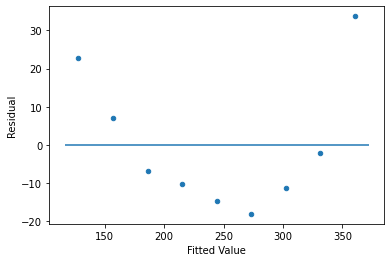

In [8]:
df['intercept'] = 1
model = ols('groove ~ intercept + mileage', data=df).fit()

df_plot = pd.DataFrame({
    'Fitted Value':model.predict(df[['intercept','mileage']]),
    'Residual':model.resid
})
ax = df_plot.plot.scatter(x='Fitted Value', y='Residual')
x_min, x_max = ax.get_xlim()
ax.hlines(0, x_min, x_max)

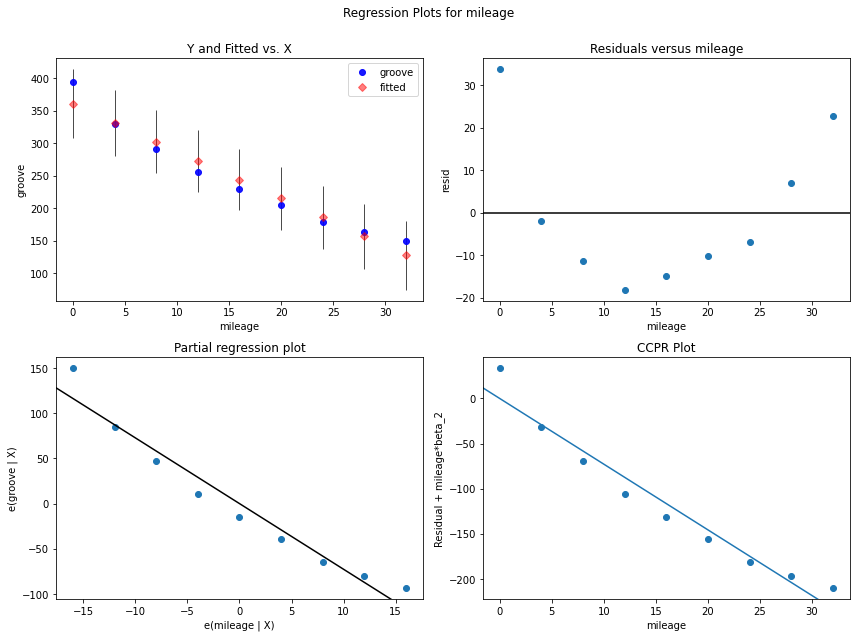

In [9]:
fig = plt.figure(figsize=(12, 9))
fig = sm.graphics.plot_regress_exog(model, 'mileage', fig)

#### 3-2. Nonconstant variance

In [10]:
df = pd.read_table(os.path.join(filedir, 'alphapluto.txt'))
df

,alpha,pluto
0,0.150,20
1,0.004,0
2,0.069,10
3,0.030,5
4,0.011,0
5,0.004,0
6,0.041,5
7,0.109,20
8,0.068,10
9,0.009,0


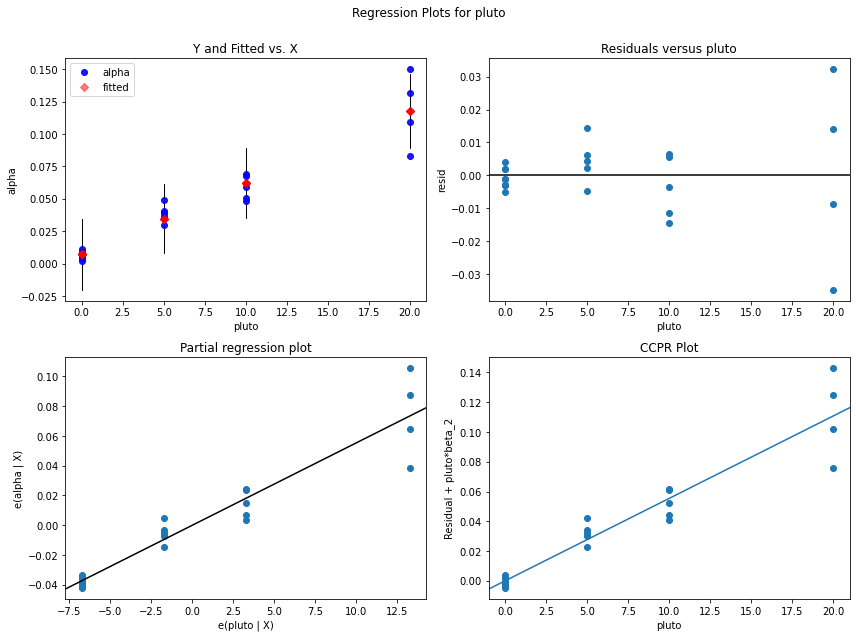

In [11]:
df['intercept'] = 1
model = ols('alpha ~ intercept + pluto', data=df).fit()
fig = plt.figure(figsize=(12, 9))
fig = sm.graphics.plot_regress_exog(model, 'pluto', fig)

#### 3-3 Outlier

In [12]:
Image(url=os.path.join(filedir, "residual_fit.png"), width=600, height=600)

#### 4. Residuals vs. Order Plot

It can be used to detect non-independence of the error terms, i.e. serial correlation

The plot is only appropriate if you know the order in which the data were collected.

In [13]:
Image(url=os.path.join(filedir, "residual_order.png"), width=600, height=600)

#### 5. QQ plot

In [14]:
df = pd.read_table(os.path.join(filedir, 'oldfaithful.txt'))
df

,duration,next
0,2.0,50
1,1.8,57
2,3.7,55
3,2.2,47
4,2.1,53
5,2.4,50
6,2.6,62
7,2.8,57
8,3.3,72
9,3.5,62


In [15]:
df.columns

Index(['duration', 'next'], dtype='object')

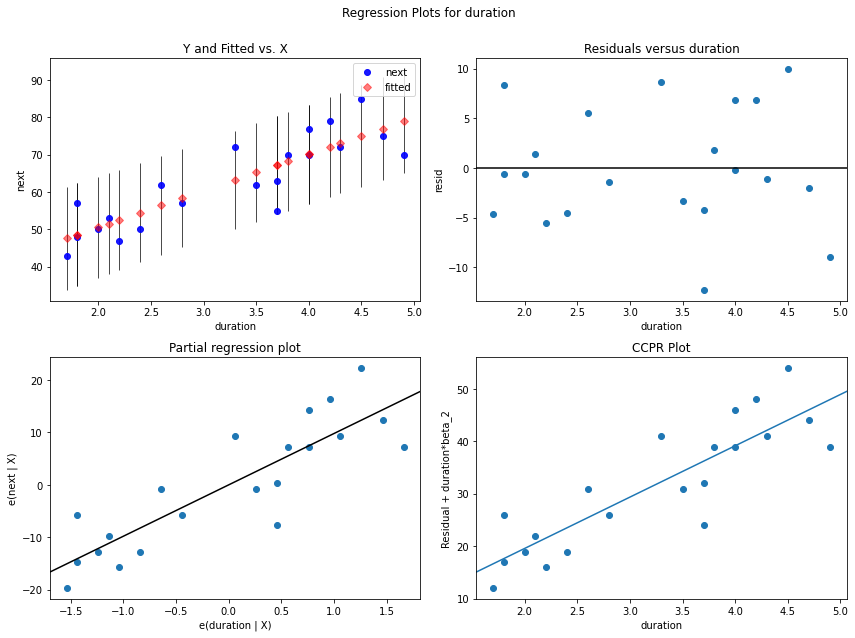

In [16]:
df['intercept'] = 1
model = ols('next ~ intercept + duration', data=df).fit()
fig = plt.figure(figsize=(12, 9))
fig = sm.graphics.plot_regress_exog(model, 'duration', fig)

/Users/yuehuazhuang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


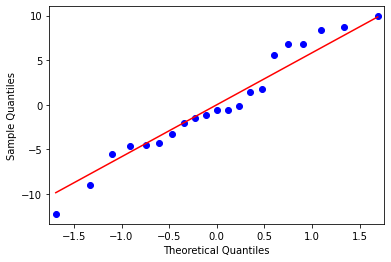

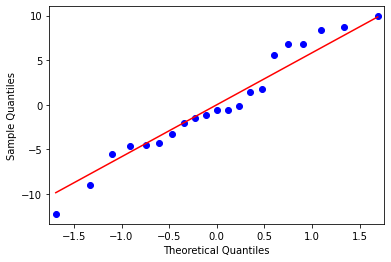

In [17]:
sm.graphics.qqplot(model.resid, dist=scipy.stats.norm, line='s')